# PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK PROPHET 





# STEP #0: PROBLEM STATEMENT

![image](skyline.jpg)

- Image Source: https://commons.wikimedia.org/wiki/File:Chicago_skyline,_viewed_from_John_Hancock_Center.jpg
- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://www.kaggle.com/currie32/crimes-in-chicago

- You must install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet

- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
# dataframes creation for both training and testing datasets 
#chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False) ***File too bog for github***
#chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False) File too bog for github
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False) #unzip compressed zip to use file


In [3]:

#chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)
chicago_df = pd.concat([chicago_df_3], ignore_index=False, axis=0)


# STEP #2: EXPLORING THE DATASET  

In [4]:
# Let's view the head of the training dataset
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [5]:
# Let's view the last elements in the training dataset
chicago_df.tail(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456694,6246478,10508650,HZ250022,05/03/2016 05:00:00 PM,078XX S MARSHFIELD AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,...,17.0,71.0,03,1166708.0,1852625.0,2016,05/10/2016 03:56:50 PM,41.751166,-87.664670,"(41.751166357, -87.664670209)"
1456695,6246521,10508653,HZ250512,05/03/2016 11:58:00 PM,026XX W LE MOYNE ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENTIAL YARD (FRONT/BACK),True,...,26.0,24.0,04A,1158381.0,1909870.0,2016,05/10/2016 03:56:50 PM,41.908427,-87.693623,"(41.908426978, -87.693622615)"
1456696,6247563,10508656,HZ250476,05/03/2016 03:15:00 PM,014XX N OGDEN AVE,1720,OFFENSE INVOLVING CHILDREN,CONTRIBUTE DELINQUENCY OF A CHILD,STREET,False,...,27.0,8.0,20,1171322.0,1909588.0,2016,05/10/2016 03:56:50 PM,41.907378,-87.646092,"(41.907378476, -87.64609233)"
1456697,6247798,10508658,HZ250506,05/03/2016 11:50:00 PM,018XX S KEDZIE AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,...,24.0,29.0,26,1155317.0,1890928.0,2016,05/10/2016 03:56:50 PM,41.856510,-87.705387,"(41.856510401, -87.705387422)"
1456698,6248016,10508659,HZ250499,05/03/2016 11:38:00 PM,038XX S PRINCETON AVE,0460,BATTERY,SIMPLE,CHA PARKING LOT/GROUNDS,False,...,3.0,34.0,08B,1174922.0,1879297.0,2016,05/10/2016 03:56:50 PM,41.824178,-87.633775,"(41.82417802, -87.6337748)"
1456699,6248192,10508661,HZ250344,05/03/2016 08:44:00 PM,070XX S WABASH AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,6.0,69.0,04B,1177941.0,1858411.0,2016,05/10/2016 03:56:50 PM,41.766797,-87.623332,"(41.766796861, -87.623332025)"
1456700,6248278,10508662,HZ250477,05/03/2016 08:00:00 AM,057XX S MICHIGAN AVE,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,APARTMENT,False,...,20.0,40.0,26,1178135.0,1867058.0,2016,05/10/2016 03:56:50 PM,41.790521,-87.622359,"(41.790520722, -87.622358898)"
1456701,6248713,10508663,HZ250466,05/03/2016 10:10:00 PM,033XX W MARQUETTE RD,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,False,...,15.0,66.0,17,1155359.0,1859995.0,2016,05/10/2016 03:56:50 PM,41.771625,-87.706062,"(41.771625308, -87.706062047)"
1456702,6248779,10508664,HZ250486,05/03/2016 11:35:00 PM,083XX S CARPENTER ST,0560,ASSAULT,SIMPLE,RESIDENCE,True,...,21.0,71.0,08A,1170770.0,1849485.0,2016,05/10/2016 03:56:50 PM,41.742462,-87.649876,"(41.742462184, -87.649876395)"
1456703,6248999,10508665,HZ250448,05/03/2016 10:15:00 PM,095XX S LOOMIS ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,...,21.0,73.0,14,1168707.0,1841343.0,2016,05/10/2016 03:56:50 PM,41.720164,-87.657669,"(41.720164061, -87.657669427)"


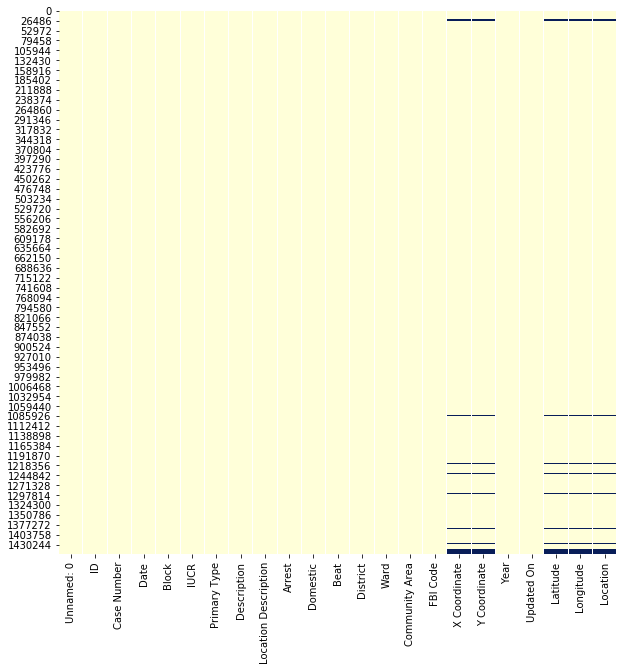

In [6]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [7]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [8]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10508693,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1,10508695,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2,10508697,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
3,10508698,05/03/2016 10:10:00 PM,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
4,10508699,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True
5,10508702,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
6,10508703,05/03/2016 10:30:00 PM,027XX S STATE ST,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False
7,10508704,05/03/2016 09:30:00 PM,002XX E 46TH ST,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False
8,10508709,05/03/2016 04:00:00 PM,014XX W DEVON AVE,BATTERY,SIMPLE,SIDEWALK,False,False
9,10508982,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True


In [9]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')


In [10]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,10508693,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1,10508695,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2,10508697,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
3,10508698,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
4,10508699,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True
5,10508702,2016-05-03 22:35:00,082XX S MARYLAND AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
6,10508703,2016-05-03 22:30:00,027XX S STATE ST,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False
7,10508704,2016-05-03 21:30:00,002XX E 46TH ST,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False
8,10508709,2016-05-03 16:00:00,014XX W DEVON AVE,BATTERY,SIMPLE,SIDEWALK,False,False
9,10508982,2016-05-03 22:30:00,069XX S ASHLAND AVE,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True


In [11]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)


In [12]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2016-05-03 23:40:00,10508693,2016-05-03 23:40:00,013XX S SAWYER AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 21:40:00,10508695,2016-05-03 21:40:00,061XX S DREXEL AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True
2016-05-03 23:31:00,10508697,2016-05-03 23:31:00,053XX W CHICAGO AVE,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False
2016-05-03 22:10:00,10508698,2016-05-03 22:10:00,049XX W FULTON ST,BATTERY,SIMPLE,SIDEWALK,False,False
2016-05-03 22:00:00,10508699,2016-05-03 22:00:00,003XX N LOTUS AVE,THEFT,$500 AND UNDER,RESIDENCE,False,True
2016-05-03 22:35:00,10508702,2016-05-03 22:35:00,082XX S MARYLAND AVE,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False
2016-05-03 22:30:00,10508703,2016-05-03 22:30:00,027XX S STATE ST,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False
2016-05-03 21:30:00,10508704,2016-05-03 21:30:00,002XX E 46TH ST,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False
2016-05-03 16:00:00,10508709,2016-05-03 16:00:00,014XX W DEVON AVE,BATTERY,SIMPLE,SIDEWALK,False,False


In [13]:
chicago_df['Primary Type'].value_counts()

THEFT                                329460
BATTERY                              263700
CRIMINAL DAMAGE                      155455
NARCOTICS                            135240
ASSAULT                               91289
OTHER OFFENSE                         87874
BURGLARY                              83397
DECEPTIVE PRACTICE                    75495
MOTOR VEHICLE THEFT                   61138
ROBBERY                               57313
CRIMINAL TRESPASS                     36912
WEAPONS VIOLATION                     17233
PUBLIC PEACE VIOLATION                13122
OFFENSE INVOLVING CHILDREN            11398
PROSTITUTION                           7633
CRIM SEXUAL ASSAULT                    6823
INTERFERENCE WITH PUBLIC OFFICER       6195
SEX OFFENSE                            4885
HOMICIDE                               2649
ARSON                                  2217
GAMBLING                               2212
LIQUOR LAW VIOLATION                   1953
KIDNAPPING                      

In [14]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         329460
BATTERY                       263700
CRIMINAL DAMAGE               155455
NARCOTICS                     135240
ASSAULT                        91289
OTHER OFFENSE                  87874
BURGLARY                       83397
DECEPTIVE PRACTICE             75495
MOTOR VEHICLE THEFT            61138
ROBBERY                        57313
CRIMINAL TRESPASS              36912
WEAPONS VIOLATION              17233
PUBLIC PEACE VIOLATION         13122
OFFENSE INVOLVING CHILDREN     11398
PROSTITUTION                    7633
Name: Primary Type, dtype: int64

In [15]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION'],
      dtype='object')

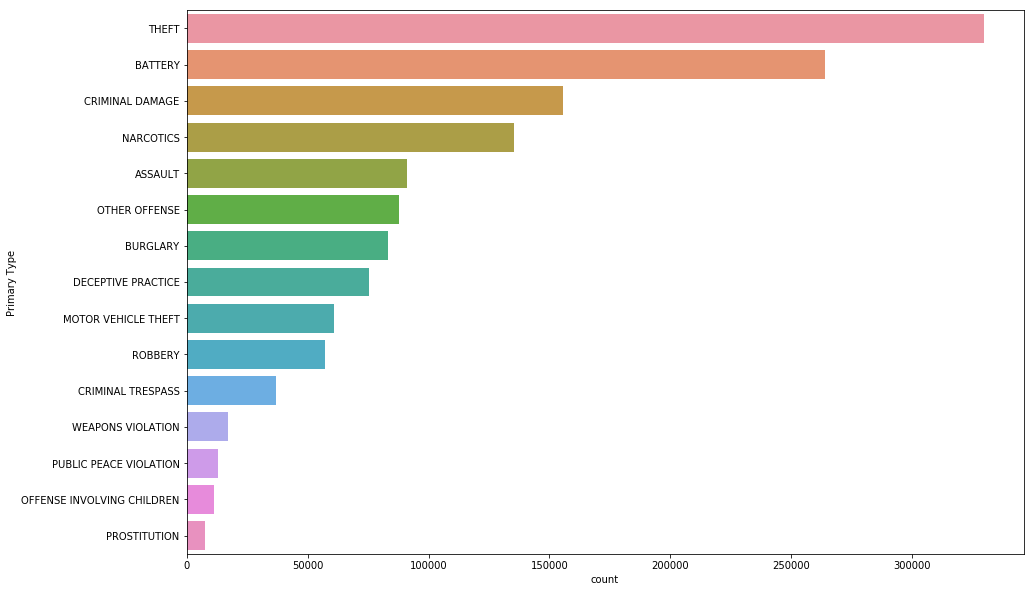

In [16]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

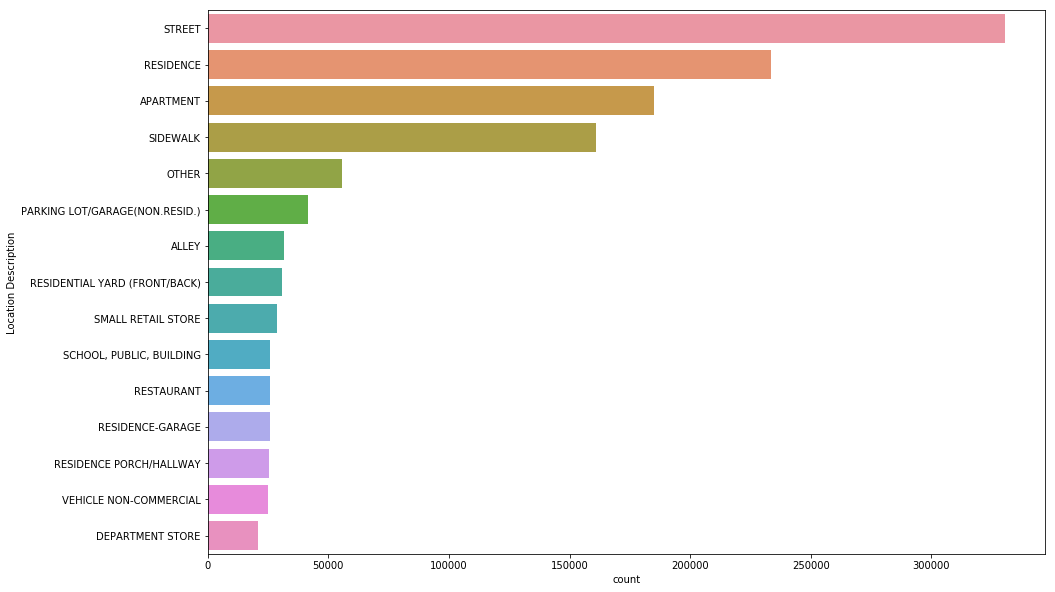

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

In [18]:
chicago_df.resample('Y').size()

Date
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

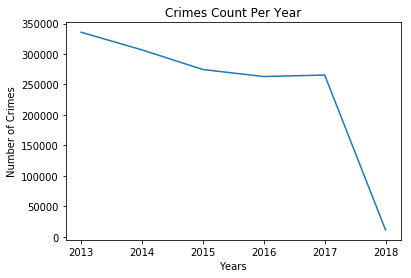

In [19]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [20]:
chicago_df.resample('M').size()

Date
2012-01-31    26194
2012-02-29    23847
2012-03-31    28533
2012-04-30    27164
2012-05-31    30067
2012-06-30    31052
2012-07-31    31945
2012-08-31    30010
2012-09-30    27730
2012-10-31    27938
2012-11-30    26010
2012-12-31    25180
2013-01-31    25357
2013-02-28    21372
2013-03-31    24922
2013-04-30    25492
2013-05-31    27959
2013-06-30    27325
2013-07-31    28593
2013-08-31    28622
2013-09-30    26295
2013-10-31    25429
2013-11-30    23518
2013-12-31    21819
2014-01-31    19870
2014-02-28    17977
2014-03-31    22117
2014-04-30    22836
2014-05-31    24807
2014-06-30    25348
              ...  
2014-08-31    25802
2014-09-30    23811
2014-10-31    23911
2014-11-30    20680
2014-12-31    20891
2015-01-31    20656
2015-02-28    16287
2015-03-31    21560
2015-04-30    21610
2015-05-31    23570
2015-06-30    23059
2015-07-31    24101
2015-08-31    24685
2015-09-30    22996
2015-10-31    22979
2015-11-30    20486
2015-12-31    21006
2016-01-31    20375
2016-02-29    1

Text(0, 0.5, 'Number of Crimes')

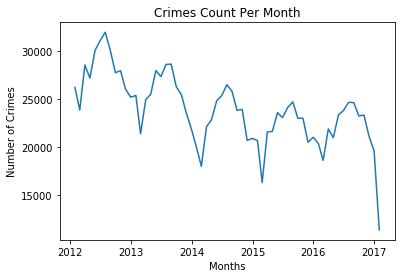

In [21]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [22]:
chicago_df.resample('Q').size()

Date
2012-03-31    78574
2012-06-30    88283
2012-09-30    89685
2012-12-31    79128
2013-03-31    71651
2013-06-30    80776
2013-09-30    83510
2013-12-31    70766
2014-03-31    59964
2014-06-30    72991
2014-09-30    76090
2014-12-31    65482
2015-03-31    58503
2015-06-30    68239
2015-09-30    71782
2015-12-31    64471
2016-03-31    60843
2016-06-30    68085
2016-09-30    72500
2016-12-31    64034
2017-03-31    11357
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

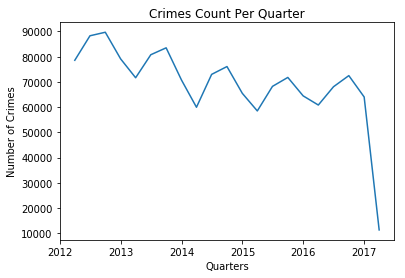

In [23]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [24]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [25]:
chicago_prophet

,Date,0
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
5,2012-06-30,31052
6,2012-07-31,31945
7,2012-08-31,30010
8,2012-09-30,27730
9,2012-10-31,27938


In [26]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [27]:
chicago_prophet

,Date,Crime Count
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
5,2012-06-30,31052
6,2012-07-31,31945
7,2012-08-31,30010
8,2012-09-30,27730
9,2012-10-31,27938


In [28]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [29]:
chicago_prophet_df

,Date,Crime Count
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
5,2012-06-30,31052
6,2012-07-31,31945
7,2012-08-31,30010
8,2012-09-30,27730
9,2012-10-31,27938


# STEP #4: MAKE PREDICTIONS

In [30]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [31]:
#to use fbprophet you need to rename columns ds and y accordingly
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [32]:
chicago_prophet_df_final

,ds,y
0,2012-01-31,26194
1,2012-02-29,23847
2,2012-03-31,28533
3,2012-04-30,27164
4,2012-05-31,30067
5,2012-06-30,31052
6,2012-07-31,31945
7,2012-08-31,30010
8,2012-09-30,27730
9,2012-10-31,27938


In [33]:
m = Prophet()
m.fit(chicago_prophet_df_final)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\patel\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [34]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,29527.994394,25858.036852,28234.988712,29527.994394,29527.994394,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,-2468.459617,0.0,0.0,0.0,27059.534776
1,2012-02-29,29341.449133,23467.437686,25820.314909,29341.449133,29341.449133,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,-4698.863062,0.0,0.0,0.0,24642.586071
2,2012-03-31,29142.038682,26983.016712,29330.137505,29142.038682,29142.038682,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,-962.793052,0.0,0.0,0.0,28179.245629
3,2012-04-30,28949.060827,26011.630869,28380.796361,28949.060827,28949.060827,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,-1744.502016,0.0,0.0,0.0,27204.558811
4,2012-05-31,28749.650377,28556.457515,30924.343511,28749.650377,28749.650377,923.679223,923.679223,923.679223,923.679223,923.679223,923.679223,0.0,0.0,0.0,29673.329600
5,2012-06-30,28556.672520,28886.389493,31310.067069,28556.672520,28556.672520,1563.312747,1563.312747,1563.312747,1563.312747,1563.312747,1563.312747,0.0,0.0,0.0,30119.985267
6,2012-07-31,28357.262068,29981.154000,32349.312478,28357.262068,28357.262068,2731.714376,2731.714376,2731.714376,2731.714376,2731.714376,2731.714376,0.0,0.0,0.0,31088.976444
7,2012-08-31,28157.851617,28968.271431,31443.483717,28157.851617,28157.851617,2059.131117,2059.131117,2059.131117,2059.131117,2059.131117,2059.131117,0.0,0.0,0.0,30216.982734
8,2012-09-30,27964.873762,27218.500974,29479.859205,27964.873762,27964.873762,381.973393,381.973393,381.973393,381.973393,381.973393,381.973393,0.0,0.0,0.0,28346.847155
9,2012-10-31,27765.463311,27184.683313,29596.625474,27765.463311,27765.463311,632.149506,632.149506,632.149506,632.149506,632.149506,632.149506,0.0,0.0,0.0,28397.612818


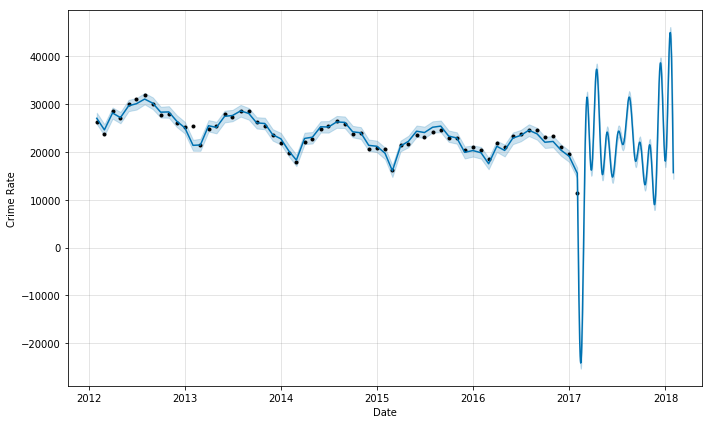

In [36]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

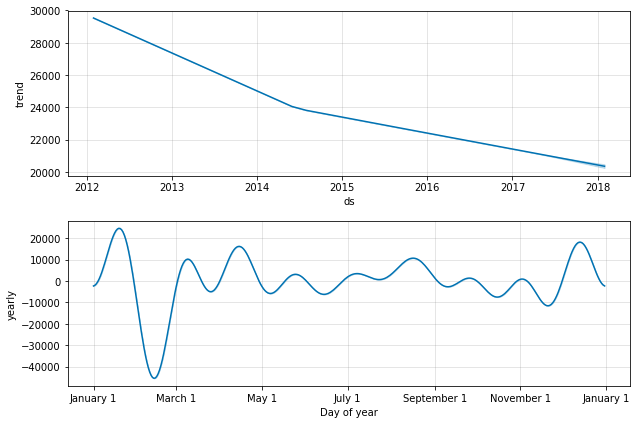

In [37]:
figure3 = m.plot_components(forecast)

# GREAT JOB, KEEP UP THE GREAT WORK!